In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
import quantrautil as q
import numpy as np
from sklearn import preprocessing

C:\Users\space\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [3]:
data = q.get_data('BTC','2023-1-1','2023-4-24')  
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-04-17  92.130096  92.130096  92.114998  92.114998  92.114998     226   
2023-04-18  92.160004  92.160004  92.160004  92.160004  92.160004     906   
2023-04-19  92.011101  92.011101  92.011101  92.011101  92.011101       3   
2023-04-20  92.285202  92.285202  92.285202  92.285202  92.285202       2   
2023-04-21  92.209999  92.264999  92.209999  92.264999  92.264999    1090   

           Source  
Date               
2023-04-17  Yahoo  
2023-04-18  Yahoo  
2023-04-19  Yahoo  
2023-04-20  Yahoo  
2023-04-21  Yahoo  


In [4]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)
data

,Open,High,Low,Close,Adj Close,Volume,Source,Open-Close,High-Low,percent_change,std_5,ret_5
Date,,,,,,,,,,,,
2023-01-10,91.339996,91.440002,91.339996,91.386101,91.386101,6504,Yahoo,-0.000505,0.001095,-0.002335,0.003812,0.001694
2023-01-11,91.529999,91.640701,91.518997,91.640701,91.640701,4053,Yahoo,-0.001209,0.001330,0.002786,0.003806,0.001676
2023-01-12,92.069298,92.069298,92.069298,92.069298,92.069298,3,Yahoo,0.000000,0.000000,0.004677,0.003537,0.002893
2023-01-13,91.910004,91.910004,91.829903,91.835197,91.835197,3913,Yahoo,0.000814,0.000872,-0.002543,0.003224,0.000936
2023-01-17,91.910004,91.910004,91.811600,91.811600,91.811600,1304,Yahoo,0.001071,0.001072,-0.000257,0.003183,0.000466
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,92.130096,92.130096,92.114998,92.114998,92.114998,226,Yahoo,0.000164,0.000164,-0.002707,0.001843,-0.000814
2023-04-18,92.160004,92.160004,92.160004,92.160004,92.160004,906,Yahoo,0.000000,0.000000,0.000489,0.001927,-0.000668
2023-04-19,92.011101,92.011101,92.011101,92.011101,92.011101,3,Yahoo,0.000000,0.000000,-0.001616,0.001462,-0.001311


In [5]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.80)
split

56

In [6]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(56, 4) (15, 4)
(56,) (15,)


In [9]:
clf = DecisionTreeClassifier(random_state=5)

In [10]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [11]:
y_pred=model.predict(X_test)

In [12]:
def apply_threshold(values, threshold):
    """Convert numeric values to binary values based on a threshold."""
    binary_values = []
    for value in values:
        if value > threshold:
            binary_values.append(1)
        elif  value < threshold:
            binary_values.append(-1)
        else:
            binary_values.append(0)
    return binary_values


threshold = 0.10

binary_values = apply_threshold(y_pred, threshold)

In [13]:
clf

DecisionTreeClassifier(random_state=5)

In [14]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.00
|   |--- feature_0 <= 0.00
|   |   |--- feature_2 <= 0.00
|   |   |   |--- class: -1
|   |   |--- feature_2 >  0.00
|   |   |   |--- feature_2 <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.00
|   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |--- feature_3 >  -0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.00
|   |   |   |   |   |--- class: -1
|   |--- feature_0 >  0.00
|   |   |--- feature_2 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.00
|   |   |   |--- class: -1
|--- feature_2 >  0.00
|   |--- feature_3 <= 0.00
|   |   |--- feature_3 <= 0.00
|   |   |   |--- feature_3 <= 0.00
|   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |   |   |--- clas

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = 'Open-Close', 'High-Low', 'std_5', 'ret_5'
classes = 'Adj Close'

plt.figure(figsize=(100, 100))
plot_tree(clf,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

In [16]:
compare=pd.DataFrame({'Actual': y_test.flatten(), 'predict':y_pred.flatten()})
compare

,Actual,predict
0,1,1
1,1,1
2,1,-1
3,-1,1
4,-1,-1
5,-1,1
6,1,1
7,-1,1
8,-1,1
9,-1,1


In [17]:
from sklearn import metrics

In [18]:
print("mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared Error:",metrics.mean_squared_error(y_test,y_pred))


mean Absolute Error: 1.2
mean squared Error: 2.4


In [19]:
#=========================================

In [20]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, binary_values, normalize=True)*100.0)

Correct Prediction (%):  40.0


In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_test, binary_values)
print(report)

              precision    recall  f1-score   support

          -1       0.50      0.33      0.40         9
           1       0.33      0.50      0.40         6

    accuracy                           0.40        15
   macro avg       0.42      0.42      0.40        15
weighted avg       0.43      0.40      0.40        15



In [22]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

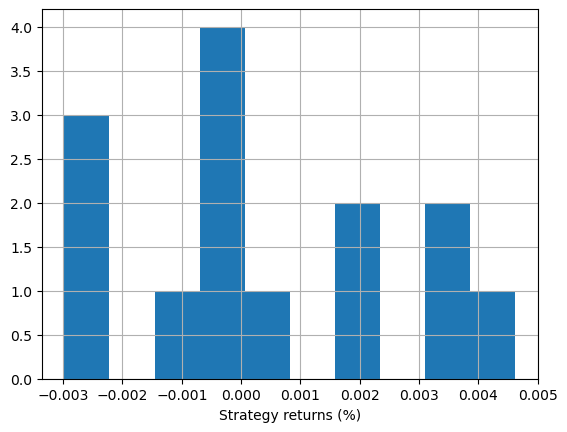

In [23]:
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

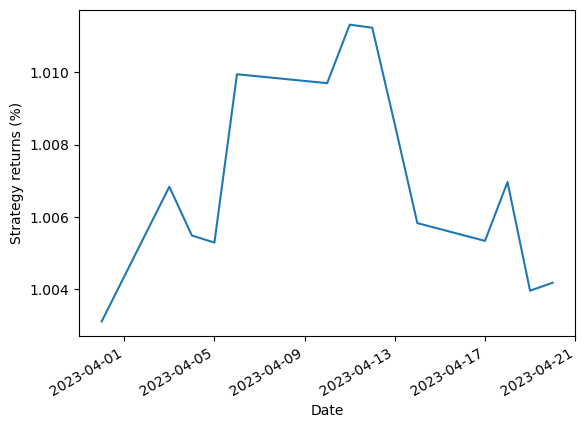

In [24]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()